# PGC

Importando as bibliotecas.

In [1]:
import re
import spacy
import pandas as pd
import time
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import cv2
import igraph as ig

regex = r"[-'a-zA-ZÀ-ÖØ-öø-ÿ0-9]+"   # raw string

Abrindo o corpus e armazenando o conteúdo completo em *content* e as linhas em *paragraphs*.

In [2]:
#fileName = "corpus-textos-DC.txt"
fileName = "corpus-textos-DC-01-09.txt"

document = open(fileName,'r', encoding='utf-8')
content  = document.read()

document = open(fileName,'r', encoding='utf-8')
paragraphs = document.readlines()

words = re.findall(regex, content)

print (f"Quantidade de palavras: {len(words)}") 

Quantidade de palavras: 113027


Removendo parágrafos em branco.

In [3]:
for paragraph in paragraphs:
    if paragraph == "\n":
        paragraphs.remove(paragraph)

In [4]:
print(f"Quantidade de parágrafos: {len(paragraphs)}")

Quantidade de parágrafos: 2174


Quantidade e frequência de palavras.

In [5]:
frequencies = dict([])
for w in words:
    w = w.lower()
    if w not in frequencies:
        frequencies[w] = 0
    frequencies[w] += 1
print (f"Tamanho do vocabulário: {len(frequencies)}")

Tamanho do vocabulário: 14734


In [6]:
fs = sorted(frequencies, key=frequencies.get, reverse=True)
for i in range(0,20):
    print(f"{frequencies[fs[i]]} - {fs[i]}")

5477 - de
3491 - a
3440 - e
3031 - que
2800 - o
1768 - em
1565 - da
1535 - do
1412 - é
1398 - um
1264 - para
1128 - uma
1127 - com
960 - os
873 - por
866 - no
849 - como
822 - não
810 - na
726 - se


Quantidade e frequência de palavras após a remoção de stopwords.

In [7]:
stopwordsPTfile = open("stopwords-pt.txt",'r', encoding='utf-8')
stopwords       = set([]) 
for s in stopwordsPTfile.readlines():
    stopwords.add(s.strip().lower())
    
words       = re.findall(regex, content)
frequencies = dict([])

# quantidade de vezes no documento
for w in words:
    w = w.lower()
    if w not in stopwords:
        if w not in frequencies:
            frequencies[w] = 0
        frequencies[w] += 1
        
print (f"Tamanho do vocabulário (sem stopwords): {len(frequencies)}")

Tamanho do vocabulário (sem stopwords): 14409


In [8]:
fs = sorted(frequencies, key=frequencies.get, reverse=True)
for i in range(0,20):
    print (f"{frequencies[fs[i]]} - {fs[i]}")

239 - ciência
212 - água
140 - tempo
124 - luz
123 - exemplo
114 - vida
114 - mundo
111 - história
105 - pesquisa
104 - química
103 - cientistas
91 - brasil
89 - animais
89 - terra
86 - física
86 - moléculas
84 - estudos
82 - vírus
80 - científica
73 - área


In [9]:
textos = []
palavras = []

for word in words:
    if(word != "----------------------------------------------------------------------------------"):
        palavras.append(word)
    else:
        textos.append(palavras)
        palavras = []

In [10]:
i = 150

In [11]:
print(textos[i])

['O', 'futuro', 'da', 'carne', 'acessibilidade', 'Foto', 'de', 'uma', 'vaca', 'preta', 'olhando', 'para', 'a', 'câmera', 'Em', 'sua', 'orelha', 'direita', 'há', 'uma', 'etiqueta', 'com', 'números', 'e', 'código', 'de', 'barras', 'Ao', 'fundo', 'pode-se', 'outras', 'vacas', 'O', 'consumo', 'de', 'carnes', 'está', 'muito', 'presente', 'na', 'nossa', 'sociedade', 'porém', 'junto', 'com', 'ele', 'aparecem', 'diversos', 'problemas', 'que', 'às', 'vezes', 'não', 'nos', 'damos', 'conta', 'A', 'naturalidade', 'com', 'que', 'se', 'compra', 'e', 'se', 'come', 'carne', 'atualmente', 'faz', 'com', 'que', 'às', 'vezes', 'seja', 'esquecido', 'ou', 'até', 'mesmo', 'que', 'não', 'saibamos', 'de', 'onde', 'vem', 'esse', 'alimento', 'e', 'muito', 'menos', 'como', 'ele', 'é', 'produzido', 'e', 'chega', 'até', 'nós', 'A', 'criação', 'de', 'gado', 'para', 'abate', 'cresceu', 'muito', 'nos', 'últimos', 'anos', 'no', 'Brasil', 'e', 'esse', 'fator', 'tem', 'ligação', 'direta', 'com', 'o', 'desmatamento', 'da'

In [12]:
textos2 = []
paragrafos = []

for paragraph in paragraphs:
    if(paragraph != "----------------------------------------------------------------------------------\n"):
        paragrafos.append(paragraph)
    else:
        textos2.append(paragrafos)
        paragrafos = []

In [13]:
print(textos2[i])

['O futuro da carne\n', '#acessibilidade Foto de uma vaca preta olhando para a câmera. Em sua orelha direita há uma etiqueta com números e código de barras. Ao fundo pode-se outras vacas.\n', 'O consumo de carnes está muito presente na nossa sociedade, porém junto com ele aparecem diversos problemas que às vezes não nos damos conta. A naturalidade com que se compra e se come carne atualmente faz com que às vezes seja esquecido ou até mesmo que não saibamos de onde vem esse alimento e muito menos como ele é produzido e chega até nós.\n', 'A criação de gado para abate cresceu muito nos últimos anos no Brasil, e esse fator tem ligação direta com o desmatamento da Amazônia e do Cerrado, já que é preciso espaço para a criação desses animais e também para a plantação de grãos usados como alimentos. [1] Outro fator preocupante é a pegada hídrica da carne. Pegada hídrica é a quantidade de água que é usada para a fabricação de algum produto, segundo a Embrapa a média da pegada hídrica para a ca

In [14]:
tamanhoTitulo = []
for i in range (len(textos2)):
    tamanhoTitulo.append(len(textos2[i][0][:-1]))

print(tamanhoTitulo)

[40, 22, 65, 20, 56, 32, 36, 52, 31, 71, 46, 21, 37, 29, 37, 39, 54, 24, 14, 25, 24, 40, 23, 40, 70, 45, 32, 22, 36, 33, 25, 26, 52, 63, 36, 45, 51, 18, 34, 11, 74, 35, 20, 22, 15, 64, 23, 40, 37, 42, 52, 78, 48, 23, 71, 7, 28, 27, 44, 7, 27, 26, 29, 46, 57, 42, 53, 40, 29, 52, 45, 68, 45, 74, 54, 33, 36, 56, 45, 69, 25, 32, 27, 51, 36, 46, 42, 27, 66, 43, 42, 78, 60, 38, 22, 61, 38, 25, 91, 37, 52, 65, 49, 31, 68, 61, 37, 31, 55, 30, 34, 43, 21, 26, 37, 22, 51, 59, 71, 40, 57, 30, 34, 48, 51, 39, 34, 19, 20, 62, 40, 40, 83, 76, 48, 20, 29, 43, 49, 43, 66, 36, 42, 74, 70, 36, 48, 46, 35, 63, 17]


In [15]:
mediaParagrafos = []
tamanhoParagrafos = []
aux = []
maior = 0
txtMaior = 0
parMaior = 0

for i in range (len(textos2)):
    for j in range (1,len(textos2[i])-1):
        aux.append(len(textos2[i][j][:-1]))
        if len(textos2[i][j][:-1]) > maior:
            maior = len(textos2[i][j][:-1])
            txtMaior = i
            parMaior = j
    #print(tamanhoParagrafos)
    #print(sum(tamanhoParagrafos))
    #print(len(tamanhoParagrafos))
    #print(sum(tamanhoParagrafos)/len(tamanhoParagrafos))
    mediaParagrafos.append(round(sum(aux)/len(aux)))
    tamanhoParagrafos.append(aux)
    aux = []

print("Maior parágrafo tem",len(textos2[txtMaior][parMaior][:-1]),
      "caracteres\nTexto:",textos2[txtMaior][0][:-1],
      "\nParágrafo:\n\t",textos2[txtMaior][parMaior][:-1])

#print(tamanhoParagrafos)
print(mediaParagrafos)
#print(textos2[115][5])
#print(len(textos2[115][5][:-1]))

Maior parágrafo tem 4235 caracteres
Texto: Os impactos da COVID-19 intensificados sobre a comunidade LGBTQIA+ 
Parágrafo:
	 #acessibilidade Infográfico feito pela empresa Bluevision sobre O que significa a sigla LGBTQIA+. Acima o título “O que significa a sigla LGBTQIA+?”, ao lado de “Movimento político e social de inclusão de pessoas de diversas orientações sexuais e identidade de gênero tem uma sigla repleta de letras. Entenda o que elas significam e a importância que elas têm” e logo abaixo “Nascido sob a sigla GLS, o movimento político e social de inclusão de pessoas de diversas orientações sexuais e identidades de gênero mudou muito e passou a incluir pessoas não heterossexuais e não cisgênero. Assim, sua sigla cresceu e incorporou diversas letrinhas – todas elas igualmente importantes, mas várias desconhecidas por muita gente. Entenda o que significa cada uma delas e qual o sentido do “+” em seu final. Abaixo há ilustrações de cada letra. O L, pintado de laranja, está associado a

In [16]:
postagging = spacy.load('pt_core_news_lg')

In [17]:
parsedData = postagging(textos2[i-1][0][:-1])

In [18]:
print(parsedData)

Como saber a situação da sua cidade frente ao novo coronavírus?


In [19]:
for j,word in enumerate(parsedData):
    print("Palavra:",word.text,"\nLemma:",word.lemma_,"\nPostag:",word.pos_,"\n")#,word.tag_)

Palavra: Como 
Lemma: Como 
Postag: SCONJ 

Palavra: saber 
Lemma: saber 
Postag: VERB 

Palavra: a 
Lemma: o 
Postag: DET 

Palavra: situação 
Lemma: situação 
Postag: NOUN 

Palavra: da 
Lemma: da 
Postag: DET 

Palavra: sua 
Lemma: suar 
Postag: DET 

Palavra: cidade 
Lemma: cidade 
Postag: NOUN 

Palavra: frente 
Lemma: frente 
Postag: ADV 

Palavra: ao 
Lemma: ao 
Postag: DET 

Palavra: novo 
Lemma: novo 
Postag: ADJ 

Palavra: coronavírus 
Lemma: coronavírus 
Postag: NOUN 

Palavra: ? 
Lemma: ? 
Postag: PUNCT 



In [20]:
for word in parsedData:
    if word.ent_type_:
        print(word.text, word.ent_type_)

In [21]:
nPalavras = []
nParagrafos = []

for num in range (len(textos)):
    nPalavras.append(len(textos[num]))
    nParagrafos.append(len(textos2[num]))

In [22]:
print(nPalavras)
print(nParagrafos)

[345, 532, 913, 322, 557, 400, 400, 345, 577, 1129, 439, 311, 300, 516, 345, 449, 341, 799, 609, 714, 612, 375, 236, 438, 766, 381, 371, 1757, 330, 339, 292, 355, 203, 1052, 619, 363, 435, 487, 426, 678, 584, 529, 271, 691, 1079, 335, 1044, 583, 511, 668, 1031, 631, 348, 678, 342, 855, 768, 913, 515, 327, 389, 1702, 1153, 1124, 758, 947, 392, 443, 706, 1324, 810, 851, 816, 472, 697, 367, 406, 613, 973, 737, 576, 1228, 1441, 1452, 1252, 1249, 1309, 533, 1171, 651, 1341, 731, 1200, 687, 782, 749, 580, 1152, 749, 552, 1083, 685, 756, 1236, 779, 934, 554, 606, 564, 1219, 437, 1011, 987, 563, 788, 652, 608, 759, 954, 607, 1219, 886, 812, 835, 778, 443, 618, 654, 1048, 1011, 712, 917, 547, 1111, 788, 708, 948, 892, 1097, 673, 2046, 754, 1978, 724, 883, 965, 756, 803, 1026, 903, 933]
[9, 18, 33, 6, 13, 9, 7, 7, 9, 20, 11, 7, 7, 8, 8, 10, 7, 23, 9, 16, 9, 11, 7, 7, 10, 8, 7, 46, 6, 7, 7, 7, 8, 23, 8, 6, 8, 8, 7, 10, 14, 11, 7, 11, 13, 6, 14, 11, 8, 10, 35, 11, 11, 11, 8, 11, 19, 16, 15, 11, 12

In [23]:
t=time.perf_counter()

nNounsTotal = []
nAdjTotal = []
nVerbTotal = []
nNesTotal = []
nDetTotal = []
nConjTotal = []
nAdvTotal = []
nAdpTotal = []
nNumTotal = []
xTotal = []

for k in range (len(textos)):
    nNouns = 0
    nAdj = 0
    nVerb = 0
    nNes = 0
    nDet = 0
    nConj = 0
    nAdv = 0
    nAdp = 0
    nNum = 0
    x = 0
    for l in range (len(textos2[k])):        
        parsedData = postagging(textos2[k][l])
        for j,palavra in enumerate(parsedData):
            tag = palavra.pos_
            if tag in ["NOUN","PROPN"]:
                nNouns += 1
            elif tag in ["ADJ"]:
                nAdj += 1
            elif tag in ["VERB"]:
                nVerb += 1
            elif tag in ["DET"]:
                nDet += 1
            elif tag in ["CONJ","CCONJ"]:
                nConj += 1
            elif tag in ["ADV"]:
                nAdv += 1
            elif tag in ["NUM"]:
                nNum += 1
            elif tag in ["ADP"]:
                nAdp += 1
            elif tag in ["X"]: # fazer sem stopwords
                x += 1
                print(palavra)
            if palavra.ent_type_:
                nNes += 1
            #print("Palavra:",palavra.text,"\nLemma:",palavra.lemma_,"\nPostag:",palavra.pos_,"\n") #word.tag_)
    nNounsTotal.append(round(nNouns/nPalavras[k],4))
    nAdjTotal.append(round(nAdj/nPalavras[k],4))
    nVerbTotal.append(round(nVerb/nPalavras[k],4))
    nNesTotal.append(round(nNes/nPalavras[k],4))
    nDetTotal.append(round(nDet/nPalavras[k],4))
    nConjTotal.append(round(nConj/nPalavras[k],4))
    nAdvTotal.append(round(nAdv/nPalavras[k],4))
    nAdpTotal.append(round(nAdp/nPalavras[k],4))
    nNumTotal.append(round(nNum/nPalavras[k],4))
    xTotal.append(round(x/nPalavras[k],4))
    
print(round(time.perf_counter()-t,3), "segundos")

thinking
eye
tracking
H+
peer
loss
day
band
gap
screen
receptor
binding
domain
in
in
in
drug
screening
old
school
twist
in
natura
43.759 segundos


In [24]:
print("Substantivos:",nNounsTotal)
print("Adjetivos:",nAdjTotal)
print("Verbos:",nVerbTotal)
print("Entidades nomeadas:",nNesTotal)
print("Determinantes:",nDetTotal)
print("Conjunções:",nConjTotal)
print("Advérbios:",nAdvTotal)
print("Adposições:",nAdpTotal)
print("Numerais:",nNumTotal)
print("Desconhecidos:",xTotal)

Substantivos: [0.3362, 0.3684, 0.3395, 0.3758, 0.4022, 0.2825, 0.36, 0.2957, 0.3016, 0.3198, 0.3303, 0.2765, 0.3333, 0.3469, 0.2812, 0.3007, 0.305, 0.2215, 0.3547, 0.3529, 0.3415, 0.2773, 0.3305, 0.3014, 0.3133, 0.2966, 0.3801, 0.2977, 0.3, 0.292, 0.3699, 0.2901, 0.3695, 0.2557, 0.294, 0.3058, 0.3954, 0.306, 0.3803, 0.3378, 0.4092, 0.3138, 0.3358, 0.2836, 0.3225, 0.3403, 0.2912, 0.295, 0.2916, 0.253, 0.3395, 0.3439, 0.3534, 0.2625, 0.3363, 0.3977, 0.3529, 0.3713, 0.301, 0.3089, 0.2956, 0.2867, 0.2663, 0.3158, 0.2889, 0.32, 0.3061, 0.3002, 0.3272, 0.2636, 0.3049, 0.342, 0.2794, 0.2924, 0.33, 0.2943, 0.3005, 0.3002, 0.3094, 0.3229, 0.3229, 0.3779, 0.3046, 0.3815, 0.2564, 0.3195, 0.3163, 0.3265, 0.2886, 0.2627, 0.3169, 0.342, 0.3317, 0.3362, 0.2749, 0.3311, 0.3552, 0.2535, 0.2804, 0.2736, 0.2853, 0.3416, 0.3479, 0.3018, 0.2991, 0.3126, 0.2924, 0.3432, 0.3067, 0.3175, 0.2494, 0.2572, 0.2958, 0.3126, 0.2043, 0.3021, 0.3207, 0.2701, 0.2642, 0.3278, 0.2855, 0.281, 0.2796, 0.2994, 0.2828, 0.35

In [25]:
titulos = []
for i in range (len(textos2)):
    titulos.append(textos2[i][0][:-1])

In [26]:
pergunta = []

for titulo in titulos:
    if(titulo.find('?') != -1):
        pergunta.append(1)
    else:
        pergunta.append(0)

In [27]:
for i in range (len(textos2)):
    print(textos2[i][0][:-1])

Livro - Professor, para que estudo isso?
Coleção Contém Química
O que é um podcast? É tipo rádio? Como faço para começar a ouvir?
Nojo no mundo animal
Prêmio Nobel 2017 – Microscopia Eletrônica com Criogenia
Que seja eterno enquanto dure...
O que dá cor aos fogos de artifício?
Por que café descafeinado tem gosto e aroma de café?
Arco-íris de sons? O que seria?
[ENTREVISTA] Água em Marte: os próximos passos para a pesquisa espacial
Lua de Sangue: entenda como funciona o Eclipse
Por que o céu é azul?
Estratégias de contracepção masculina
Os alquimistas estão chegando
E se acabássemos com o efeito estufa?
A ciência que você vê, mas não percebe!
Pílula anticoncepcional para o homem: é uma realidade?
Se sentindo um impostor?
O voo de Ícaro
O Roubo da Medalha Fields
Colesterol pode ser bom?
Números imaginários… Mas o quê? Por quê?
Viagra feminino existe?
O CO2 é o grande vilão do efeito estufa?
Crônica de uma tragédia anunciada: a morte assistida do Museu Nacional
O que as vacas têm a ver co

In [42]:
df = pd.read_excel("Relacionados.xlsx")

In [43]:
df

,Post,Rel1,Rel2,Rel3,Área
0,"Livro – Professor, para que estudo isso?",Coleção Contém Química,O que é um podcast? É tipo rádio? Como faço pa...,Qual o papel do professor universitário?,Ciência
1,Coleção Contém Química,"Livro – Professor, para que estudo isso?",O que é um podcast? É tipo rádio? Como faço pa...,A química dos sabores,Química
2,O que é um podcast? É tipo rádio? Como faço pa...,Coleção Contém Química,"Livro – Professor, para que estudo isso?","A ciência que você vê, mas não percebe!",Tecnologia
3,Nojo no mundo animal,Coleção Contém Química,"Livro – Professor, para que estudo isso?",Que seja eterno enquanto dure…,Biologia
4,Prêmio Nobel 2017 – Microscopia Eletrônica com...,Coleção Contém Química,Prêmio Nobel em Medicina 2018 – Imunologia e C...,[Física e Química] Prêmio Nobel premia pesquis...,Química
...,...,...,...,...,...
146,O efeito Hawthorne e a nossa vontade de melhorar,Preste atenção! Neurociência explica o que voc...,Aversão à perda e efeito dotação: uma pequena ...,Se sentindo um impostor?,Psicologia
147,Carne caramelizada: uma receita não-enzimática,As especiarias e os aromas,O que acontece no seu corpo após tomar aquela ...,Produtos de Reações Químicas,Biologia
148,Participação de animais em pesquisa,Nojo no mundo animal,Será que basta olhos para ver o arco-íris? Com...,Como matar um vírus?,Biologia
149,Como saber a situação da sua cidade frente ao ...,Como medir o surto do novo coronavírus?,Máscaras contra o coronavírus: usar ou não usar?,A percepção dos brasileiros sobre a ciência,Matemática


In [44]:
edges = []
    
for i in range (len(df)):
    rel = []
    rel.append(list(df[df['Post'][i] == df['Rel1']].index))
    rel.append(list(df[df['Post'][i] == df['Rel2']].index))
    rel.append(list(df[df['Post'][i] == df['Rel3']].index))


    for j in range (len(rel)):
        for k in range (len(rel[j])):
            edges.append([rel[j][k],i])
    
edges

[[1, 0],
 [8, 0],
 [15, 0],
 [19, 0],
 [2, 0],
 [3, 0],
 [7, 0],
 [10, 0],
 [21, 0],
 [24, 0],
 [34, 0],
 [13, 0],
 [20, 0],
 [47, 0],
 [48, 0],
 [0, 1],
 [2, 1],
 [3, 1],
 [4, 1],
 [7, 1],
 [10, 1],
 [20, 1],
 [34, 1],
 [13, 1],
 [23, 1],
 [28, 1],
 [48, 1],
 [50, 1],
 [112, 1],
 [25, 1],
 [85, 1],
 [0, 2],
 [1, 2],
 [17, 2],
 [110, 2],
 [8, 2],
 [27, 2],
 [81, 2],
 [109, 2],
 [5, 3],
 [16, 3],
 [148, 3],
 [19, 3],
 [76, 3],
 [40, 4],
 [30, 4],
 [36, 4],
 [41, 4],
 [90, 4],
 [12, 5],
 [33, 5],
 [3, 5],
 [16, 5],
 [19, 5],
 [135, 5],
 [42, 6],
 [8, 6],
 [15, 6],
 [73, 6],
 [11, 6],
 [31, 6],
 [56, 6],
 [87, 6],
 [108, 7],
 [22, 7],
 [11, 8],
 [13, 8],
 [73, 8],
 [127, 8],
 [18, 9],
 [31, 9],
 [55, 9],
 [143, 9],
 [43, 9],
 [38, 9],
 [40, 9],
 [61, 9],
 [11, 10],
 [18, 10],
 [55, 10],
 [83, 10],
 [26, 10],
 [69, 10],
 [103, 10],
 [45, 11],
 [87, 11],
 [127, 11],
 [6, 11],
 [26, 11],
 [31, 11],
 [15, 11],
 [18, 11],
 [23, 11],
 [42, 11],
 [43, 11],
 [22, 12],
 [16, 12],
 [70, 13],
 [17, 

In [54]:
g = ig.Graph(directed=True)
g.add_vertices(len(df))
for i in range(len(g.vs)):
    g.vs[i]["id"]= i
    g.vs[i]["area"]= df['Área'][i]
    g.vs[i]["label"]= str(i)
    #g.vs[i]["label"]= str(df["Post"][i][:20] +
    #                      "\n" + df["Post"][i][20:40] +
    #                      "\n" + df["Post"][i][40:60] +
    #                      "\n" + df["Post"][i][60:80])
g.add_edges(edges)

visual_style = {}
out_name = "graph.pdf"

color_dict = {"Biologia": "green",
              "Ciência": "red",
              "Química": "yellow",
              "Física": "blue",
              "História": "pink",
              "Medicina": "cyan",
              "Astronomia": "orange",
              "Atualidades": "brown",
              "Matemática": "olive",
              "Psicologia": "purple",
              "Tecnologia": "gray"}
visual_style["bbox"] = (4000,4000)
visual_style["margin"] = 100
#visual_style["vertex_color"] = ["gray"]
visual_style["vertex_color"] = [color_dict[area] for area in g.vs["area"]]
visual_style["vertex_size"] = 120
visual_style["vertex_label_size"] = 35
visual_style["edge_curved"] = True
visual_style["edge_widht"] = 10
edges_colors = []
for i in range (len(g.es)): edges_colors.append(g.vs[g.es[i].source]["area"])
visual_style["edge_color"] = [color_dict[area] for area in edges_colors]
visual_style["layout"] = g.layout_lgl()

ig.plot(g, out_name, **visual_style);

In [32]:
print("Número de vértices no grafo:", g.vcount())
print("Número de arestas no grafo:", g.ecount())
print("Grau máximo no grafo:", g.maxdegree())

Número de vértices no grafo: 151
Número de arestas no grafo: 453
Grau máximo no grafo: 19


In [33]:
refs = []
for i in range (len(df)):
    refs.append(len(g.neighbors(i, mode='IN')))
print(refs)

[15, 16, 8, 5, 5, 6, 8, 2, 4, 8, 7, 11, 2, 3, 5, 15, 4, 6, 6, 5, 2, 5, 3, 4, 5, 2, 5, 11, 2, 5, 4, 6, 4, 6, 3, 7, 5, 3, 6, 6, 2, 4, 10, 7, 1, 3, 5, 5, 4, 1, 1, 4, 5, 7, 2, 5, 7, 6, 6, 5, 0, 2, 1, 4, 0, 3, 3, 2, 4, 3, 1, 0, 2, 3, 4, 4, 1, 3, 3, 3, 2, 0, 0, 1, 2, 0, 0, 5, 2, 4, 2, 1, 1, 5, 5, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 3, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 3, 0, 1, 0, 0, 4, 1, 5, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 0, 0]


In [34]:
i = 149
print(f"Texto {i} - {textos2[i][0][:-1]}")
print(f"Autor: {textos2[i][-1][:-1]}")
print(f"Número de palavras: {nPalavras[i]}")
print(f"Número de parágrafos: {nParagrafos[i]}") ####### Título e Autor contam como parágrafos
print(f"Número de substantivos: {nNounsTotal[i]}")
print(f"Número de adjetivos: {nAdjTotal[i]}")
print(f"Número de verbos: {nVerbTotal[i]}")
print(f"Número de Entidades Nomeadas: {nNesTotal[i]}")
print(f"Número de Determinantes:",nDetTotal[i])
print(f"Número de Conjunções:",nConjTotal[i])
print(f"Número de Advérbios:",nAdvTotal[i])
print(f"Número de Adposições:",nAdpTotal[i])
print(f"Número de Numerais:",nNumTotal[i])
print(f"Tamanho médio dos parágrafos:",mediaParagrafos[i])
print(f"Número de caracteres do título:",tamanhoTitulo[i])
print(f"Número de Desconhecidos:",xTotal[i])
print(f"É uma pergunta?: {pergunta[i]}")
print(f"Vezes relacionado: {refs[i]}")

Texto 149 - Como saber a situação da sua cidade frente ao novo coronavírus?
Autor: Marcelo Pena
Número de palavras: 903
Número de parágrafos: 16
Número de substantivos: 0.2802
Número de adjetivos: 0.0631
Número de verbos: 0.1274
Número de Entidades Nomeadas: 0.0875
Número de Determinantes: 0.1451
Número de Conjunções: 0.0343
Número de Advérbios: 0.072
Número de Adposições: 0.1406
Número de Numerais: 0.0266
Tamanho médio dos parágrafos: 367
Número de caracteres do título: 63
Número de Desconhecidos: 0.0
É uma pergunta?: 1
Vezes relacionado: 0


In [35]:
nomes = ['numPal', 'numPar','numSub', 'numAdj', 'numVrb', 'numNEs','numDet',
         'numConj','numAdv','numAdp','numNum','Pergunta','tamMédioParagraf','tamTitulo', 'refs']
df = pd.DataFrame(list(zip(nPalavras, nParagrafos, nNounsTotal, nAdjTotal, nVerbTotal, nNesTotal,
                           nDetTotal, nConjTotal, nAdvTotal, nAdpTotal, nNumTotal, 
                           pergunta, mediaParagrafos, tamanhoTitulo, refs)),columns=nomes)

In [36]:
print(df)
df.to_excel(r'C:\Users\Acer\Dropbox\UFABC\PGC\dataset-pln.xlsx', index = False)

     numPal  numPar  numSub  numAdj  numVrb  numNEs  numDet  numConj  numAdv  \
0       345       9  0.3362  0.0754  0.1159  0.1420  0.1594   0.0406  0.0464   
1       532      18  0.3684  0.0752  0.1034  0.1673  0.1729   0.0489  0.0169   
2       913      33  0.3395  0.0537  0.1544  0.1249  0.1796   0.0372  0.0482   
3       322       6  0.3758  0.0528  0.1273  0.0590  0.1584   0.0435  0.0373   
4       557      13  0.4022  0.0772  0.0790  0.1598  0.1544   0.0395  0.0305   
..      ...     ...     ...     ...     ...     ...     ...      ...     ...   
146     756      21  0.2857  0.0608  0.1336  0.0225  0.1944   0.0370  0.0542   
147     803      17  0.3113  0.0996  0.1283  0.0349  0.1420   0.0361  0.0411   
148    1026      11  0.2953  0.0975  0.1092  0.0322  0.1472   0.0292  0.0614   
149     903      16  0.2802  0.0631  0.1274  0.0875  0.1451   0.0343  0.0720   
150     933      13  0.2969  0.0825  0.1050  0.0182  0.1640   0.0493  0.0589   

     numAdp  numNum  Pergunta  tamMédio

In [37]:
for i in range (len(textos2)):
    print(textos2[i][-1][:-1])

admin
admin
Marcelo Pena
Camilo Angelucci
Daniele Araújo
Camilo Angelucci
Ivanise Gaubeur, Naomi Akiba
Emily Takeuchi
Cassiano Aono
Renato Cunha
Manuela Rodrigues
Fábio Furlan
Carlos Alberto-Silva
Victoria Baptista Dias Miotto, Ronei Miotto
Janaína Garcia
Vanessa Verdade
Carlos Alberto-Silva
Marcelo Pena
Marcelo Leigui
Camilo Angelucci
Hugo Suffredini
Camila Vieira
Amedea Seabra
Janaína Garcia
Fabiana Rodrigues Costa Nunes
Janaína Garcia
Amedea Seabra
Marcelo Pena
Hugo Suffredini
Vanessa Verdade
Daniele Araújo
Naomi Akiba
Vanessa Verdade
Gloria Santucci
Attalya Felix
Hugo Suffredini
Daniele Araújo
Marcelo S. Caetano, Raquel Fornari
Carlos Alberto-Silva, Vanessa Verdade
Livia Seno Ferreira Camargo
Renato Cunha
Cassiano Aono
Fábio Furlan
Janaína Garcia
Marcelo Leigui
Fábio Furlan
Gabriela Dias, Michele Salvador
Hugo Suffredini, Paula Homem de Mello
Cassiano Aono
Vanessa Verdade
Renato Cunha
Daniele Araújo
Daniele Araújo
Felipe Cesar
Renato Cunha
Wesley Góis
Jhonathan Souza
Marcelo Pena
J

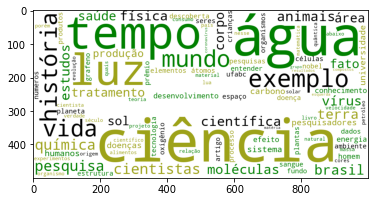

In [38]:
mask = cv2.imread("logo3.png")

colormap = ListedColormap(['green','#9DA219','black'])
cloud = WordCloud(background_color='white',
                 colormap=colormap,
                 max_words=100,
                 #contour_width=1,
                 mask=mask,
                 #width=3200,
                 #height=1600
                 )
cloud.fit_words(frequencies)
plt.imshow(cloud)
cloud.to_file('cloud2.png')